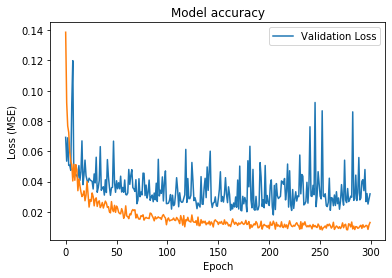

In [36]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('VGG16/test1/csvLog.csv', delimiter=',', skip_header=1, names=['epoch','loss','mse','val_loss','val_mse'])

plt.plot(data['epoch'],data['val_loss'])
plt.plot(data['epoch'],data['loss'])
plt.title('Model accuracy')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper right')


